In [588]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
import math as math
%matplotlib inline

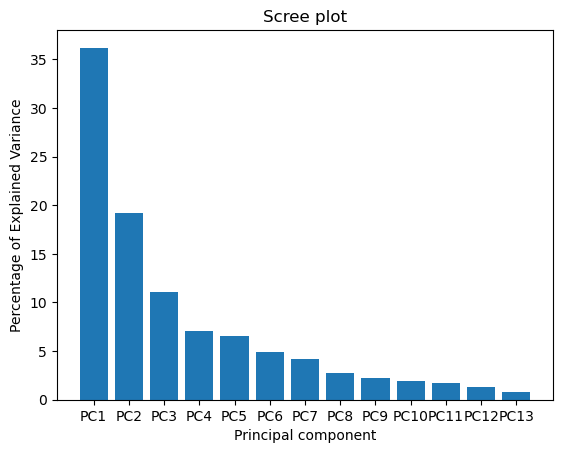

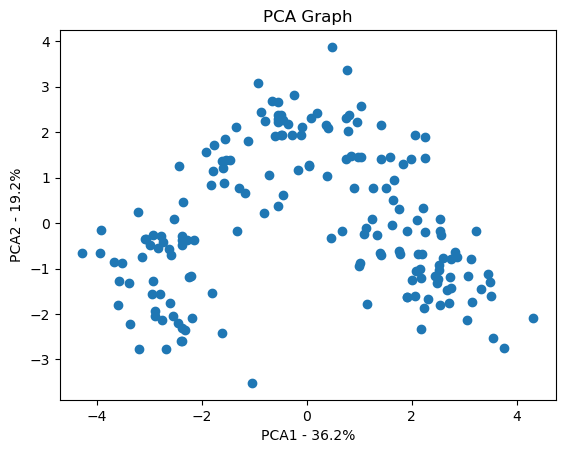

<class 'list'>


In [589]:
#Import, scale, perform PCA and plot data
colnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

data = pd.read_csv('WINE.txt', names=colnames, usecols=['2','3','4','5','6','7','8','9','10','11','12','13','14'], delimiter=r"\s+")
#data.iloc[1:].values
data.head()

scaled_data = preprocessing.scale(data)

#------------------------------------------------------------------------------------------------- Creates PCA object and performs the pca calculations ----------------------------------------------------------------------------------------
pca = PCA()
#pca.fit_transform!!!!
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ *100, decimals = 1)

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]


#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the SCREE graph -----------------------------------------------------------------
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the PCA graph -----------------------------------------------------------------
pca_data = pd.DataFrame(pca_data, index = range(1,len(data)+1), columns = labels)
plt.scatter(pca_data.PC1, pca_data.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))
plt.show()
print(list)

In [590]:
#--------------------------K-means clustering from here--------------------------

#Help functions 


def random_centers(dim, k, len_data):
    centers = []

    for i in range(k):
        center_coordinates = []
        for j in range(dim):
            rand_num = random.uniform(-4,4)
            center_coordinates.append(rand_num) 
        centers.append(center_coordinates)

    return centers

#returns the centroid with the least euclidean distance to data_point
def smallest_centroid_distance(data_point, centers, dims):

    smallest_euc_dist = math.inf
    vector_diff = 0
    #print(data_point.iloc[0:1,0:dims+1])

    
    #print("DATA POINT")
    #print(data_point)
    #print("---------------------------------------")

    for index in range(0, len(centers)):
        
        sum_square = 0
        vector_diff = data_point - centers[index]
        #print("Vector diff: " + str(vector_diff))
        for i in range(0, dims):
            sum_square += vector_diff.iloc[i]**2 
        #print("Sum square " + str(sum_square))
        euclidean_distance = np.sqrt(sum_square)
        #print("Euclidean distance " + str(euclidean_distance))
        if euclidean_distance<smallest_euc_dist:
            smallest_index = index
            smallest_euc_dist = euclidean_distance 
        #print()
        
    #print("smallest index: " + str(smallest_index))        
    return smallest_euc_dist, smallest_index


# ! Append each point of the dataset to a list. Later on we will update the centroids using the mean of each index from each list 
def point_clustering(data, centers, dims, centroids, num_dims):   
    
    #print(pca_data)
    print("test")
    print(data)
    print("test")
    print(str(len(data)))
    zero_list = []
    one_list = []
    two_list = []
    for point in range(0,len(data)):#pca_data)

        print(centroids)

        distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims], centroids, num_dims)
        
        if index == 0:
            zero_list.append(data[point])
        elif index == 1:
            one_list.append(data[point])
        elif index ==2:
            two_list.append(data[point])

    print("len: " + str(len(zero_list)))
    print("len2: " + str(len(two_list)))
    print("len1: " + str(len(one_list)))

    labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
    zero_list = pd.DataFrame(zero_list, index = range(1,len(data)+1), columns = labels)
    plt.scatter(zero_list.PC1, zero_list.PC2)
    plt.title('PCA Graph')
    plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
    plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

    labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
    one_list = pd.DataFrame(one_list, index = range(1,len(data)+1), columns = labels)
    plt.scatter(one_list.PC1, one_list.PC2)
    plt.title('PCA Graph')
    plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
    plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

    labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
    two_list = pd.DataFrame(two_list, index = range(1,len(data)+1), columns = labels)
    plt.scatter(two_list.PC1, two_list.PC2)
    plt.title('PCA Graph')
    plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
    plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

    plt.show()
    
    #print(zero_list.head())
    #print(list)

    
    return zero_list, one_list, two_list

def new_centroids(centroid_lists, dims, k):
    
    new_centroids = [[] for x in range(0,k)] #0 for x in range(0,k)
    for i in range(0,k):
        new_centroids[i] = sum(centroid_lists[i])
        new_centroids[i] = np.divide(new_centroids[i], len(centroid_lists[i]))

    return new_centroids




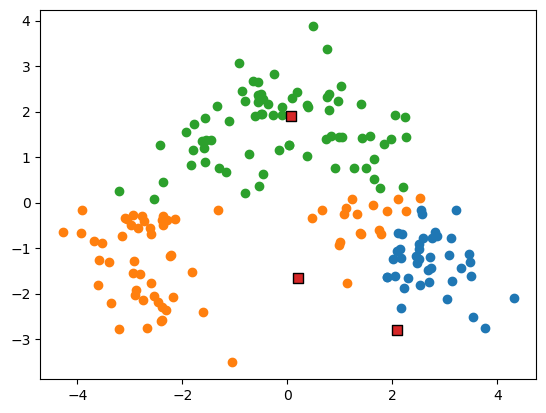

[[2.098577187306799, -2.7920213202361417], [0.20537757584426153, -1.648772036318496], [0.0717349262037752, 1.907919339724331]]
3
40
64
74


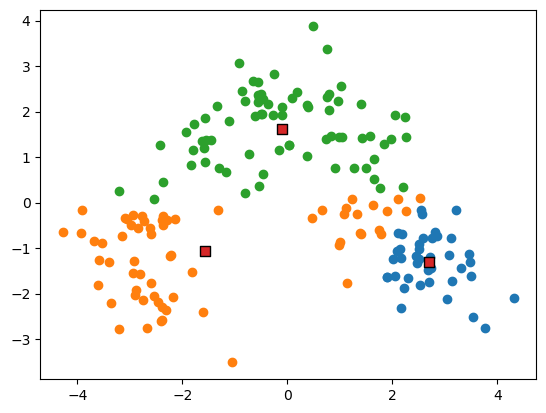

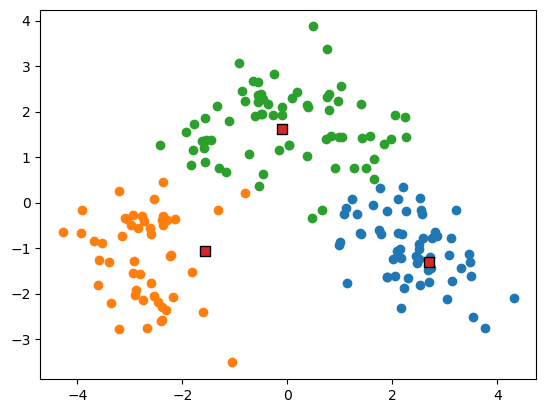

In [591]:
num_dims = 2
num_centroids = 3
centroids = random_centers(num_dims, num_centroids, len(pca_data))
zero_list = []
one_list = []
two_list = []

#print(pca_data)
#print()
#print(pca_data.astype(float).iloc[0,0:num_dims])
#print(pca_data.astype(float).iloc[1,0:num_dims].T)
#print(len(pca_data))
for point in range(0, len(pca_data)):
    distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims].T, centroids, num_dims)
    
    #print(index)
    #print("point" + str(point))
    if index == 0:
        zero_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    elif index == 1:
        one_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    elif index ==2:
        two_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)

#print('------------------------------------------------------------------------')
#print(centroids)
#print(zero_list)
labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
#print(one_list)
#print("AWIWNDNOIAWNDOIANWD")
#print(type(zero_list))
#print(len(zero_list))
#print(zero_list)
#print(zero_list[0][2])
#print("DNAPWIDNOIAWNDOAIWND")

zero_list_x_values = []
for i in range(len(zero_list)):
    zero_list_x_values.append(zero_list[i][0])

zero_list_y_values = []
for i in range(len(zero_list)):
    zero_list_y_values.append(zero_list[i][1])

one_list_x_values = []
for i in range(len(one_list)):
    one_list_x_values.append(one_list[i][0])

one_list_y_values = []
for i in range(len(one_list)):
    one_list_y_values.append(one_list[i][1])

two_list_x_values = []
for i in range(len(two_list)):
    two_list_x_values.append(two_list[i][0])

two_list_y_values = []
for i in range(len(two_list)):
    two_list_y_values.append(two_list[i][1])

plt.scatter(x = zero_list_x_values, y = zero_list_y_values)

plt.scatter(x = one_list_x_values, y = one_list_y_values)

plt.scatter(x = two_list_x_values, y = two_list_y_values)

plt.scatter(x =[centroids[0][0], centroids[1][0], centroids[2][0]],y =[centroids[0][1], centroids[1][1], centroids[2][1]], marker = "s", edgecolor = "black", s = 50)

"""plt.scatter(zero_list)
plt.scatter(one_list)
plt.scatter(two_list)"""
plt.show()

print(centroids)

centroid_lists = [zero_list, one_list,two_list]
print(len(centroid_lists))
print(len(zero_list))
print(len(one_list))
print(len(two_list))

new_centroids = new_centroids(centroid_lists, num_dims, num_centroids)


plt.scatter(x = zero_list_x_values, y = zero_list_y_values)

plt.scatter(x = one_list_x_values, y = one_list_y_values)

plt.scatter(x = two_list_x_values, y = two_list_y_values)

plt.scatter(x =[new_centroids[0][0], new_centroids[1][0], new_centroids[2][0]],y =[new_centroids[0][1], new_centroids[1][1], new_centroids[2][1]], marker = "s", edgecolor = "black", s = 50)

plt.show()

zero_list = []
two_list = []
one_list = []

for point in range(0, len(pca_data)):
    distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims].T, new_centroids, num_dims)
    
    #print(index)
    #print("point" + str(point))
    if index == 0:
        zero_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    elif index == 1:
        one_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    elif index ==2:
        two_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)



zero_list_x_values = []
for i in range(len(zero_list)):
    zero_list_x_values.append(zero_list[i][0])

zero_list_y_values = []
for i in range(len(zero_list)):
    zero_list_y_values.append(zero_list[i][1])

one_list_x_values = []
for i in range(len(one_list)):
    one_list_x_values.append(one_list[i][0])

one_list_y_values = []
for i in range(len(one_list)):
    one_list_y_values.append(one_list[i][1])

two_list_x_values = []
for i in range(len(two_list)):
    two_list_x_values.append(two_list[i][0])

two_list_y_values = []
for i in range(len(two_list)):
    two_list_y_values.append(two_list[i][1])
    
plt.scatter(x = zero_list_x_values, y = zero_list_y_values)

plt.scatter(x = one_list_x_values, y = one_list_y_values)

plt.scatter(x = two_list_x_values, y = two_list_y_values)

plt.scatter(x =[new_centroids[0][0], new_centroids[1][0], new_centroids[2][0]],y =[new_centroids[0][1], new_centroids[1][1], new_centroids[2][1]], marker = "s", edgecolor = "black", s = 50)

plt.show()


    

#point_clustering(pca_data.astype(float).iloc[:,:].values, num_centroids, num_dims, centroids, num_dims)
